In [44]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

np.random.seed(2)

In [45]:
data = pd.read_csv('CC.csv')

## Data exploration

In [47]:
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [48]:
len(data)

284807

In [49]:
data.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142404.000000,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,1.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71202.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142404.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213605.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284807.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


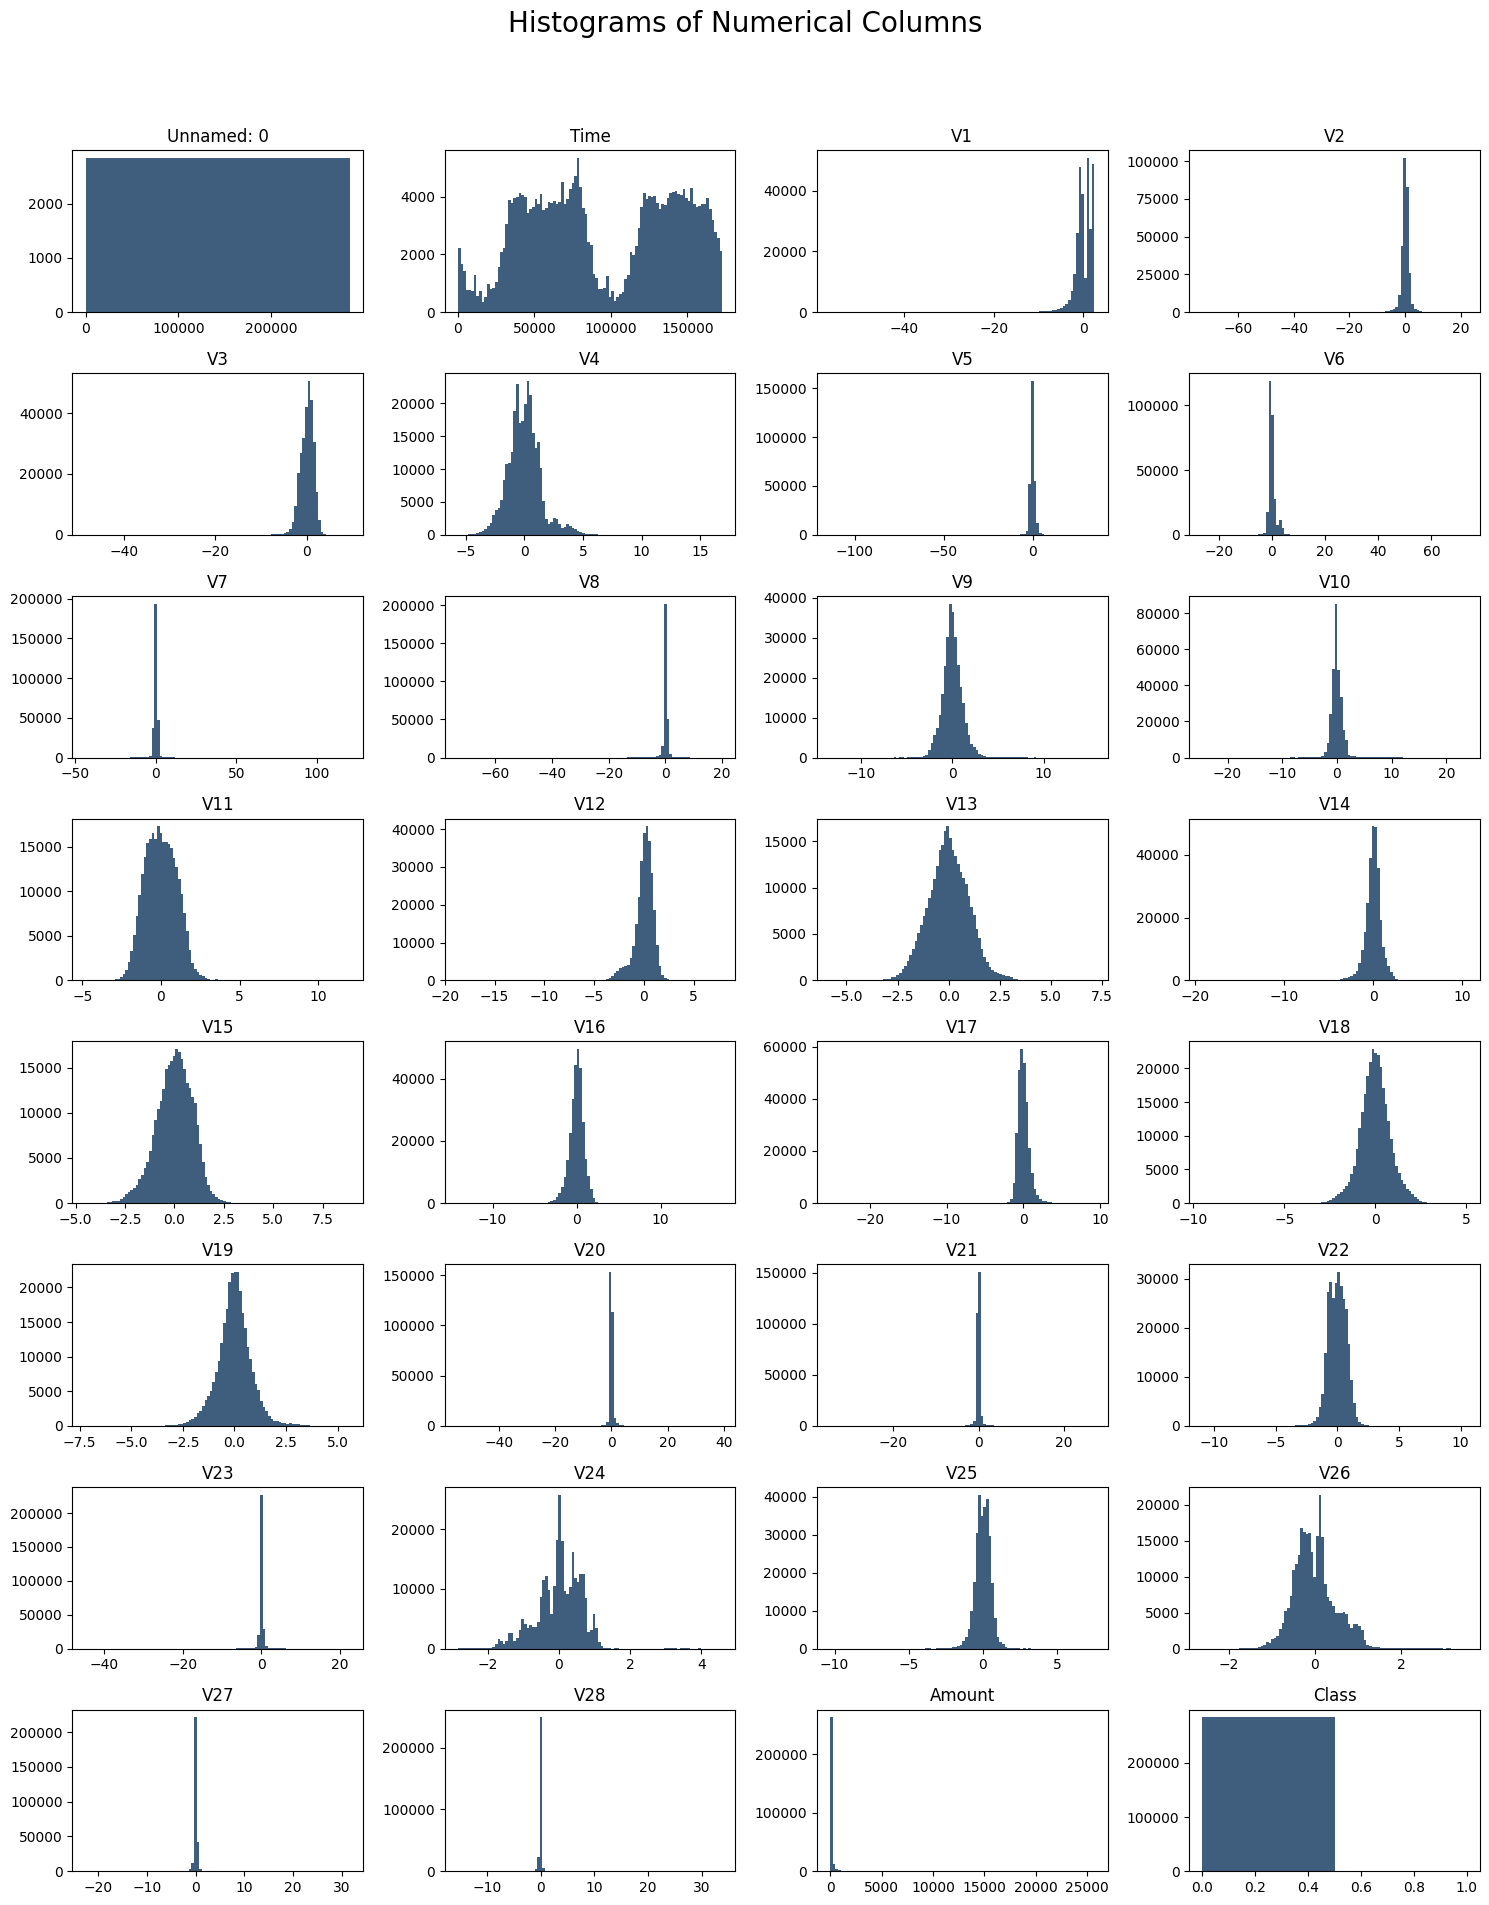

In [50]:
## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(data.columns.values[i])

    vals = np.size(data.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum

    plt.hist(data.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

- we can observe a large prevalence of Class 0 (non fraudulent).

In [51]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(data[data.Class==1]), len(data[data.Class==1])/len(data)*100000))

Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


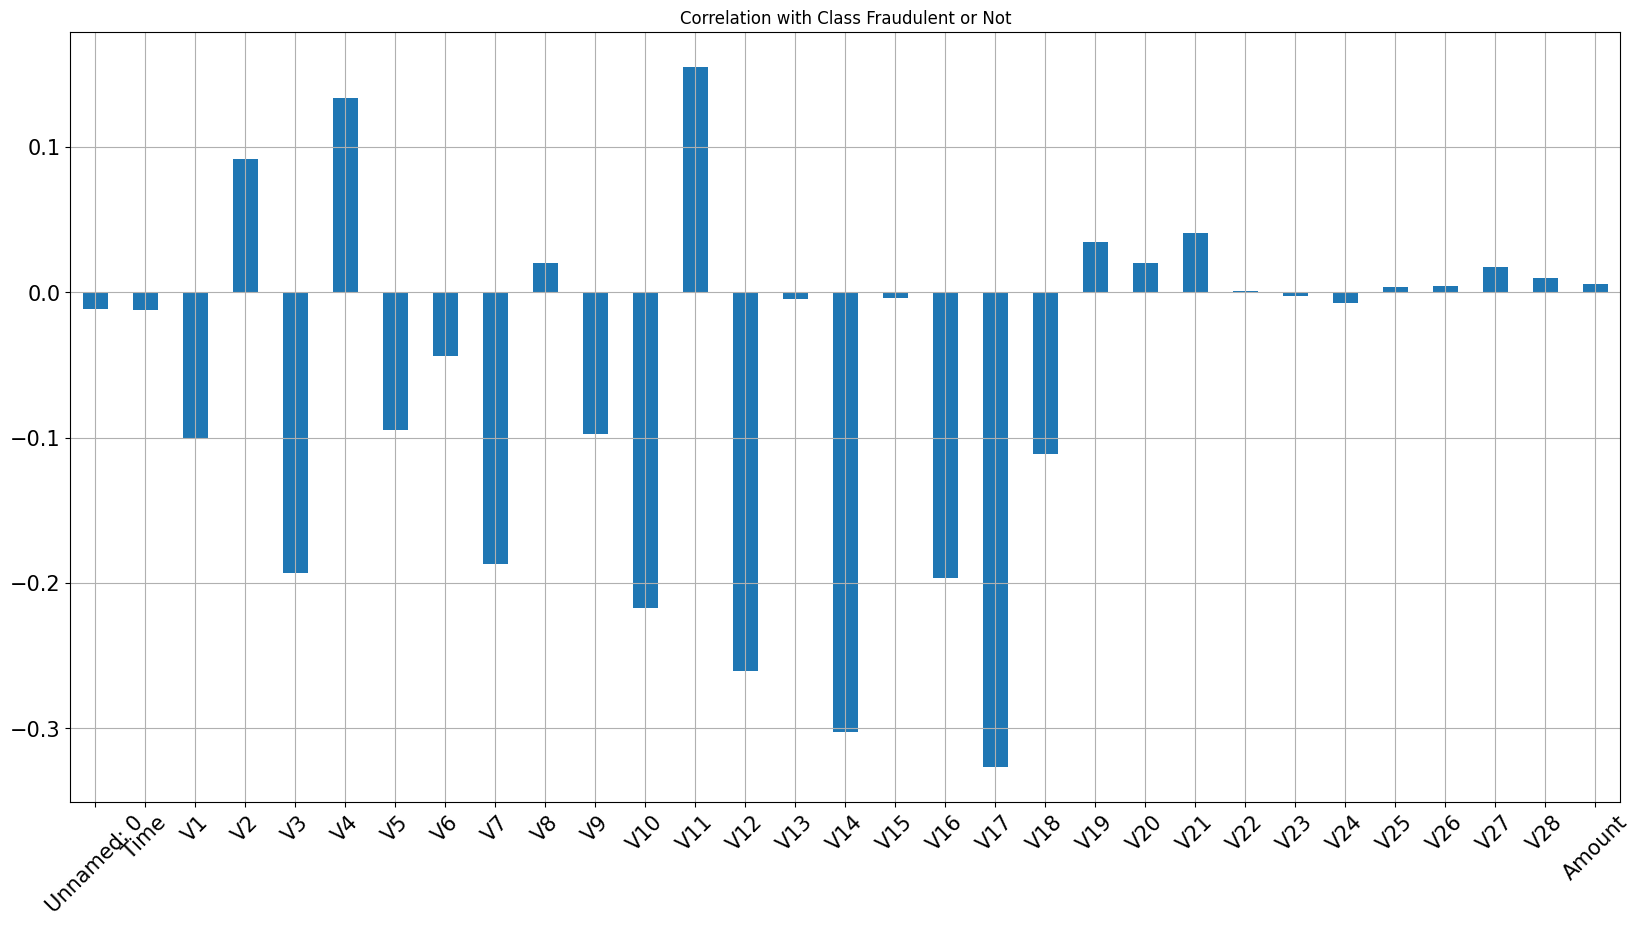

In [52]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data2 = data.drop(columns = ['Class'])   # drop non numerical columns
data2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

## Pre-processing

In [53]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1)

In [54]:
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [55]:
data = data.drop(['Time'],axis=1)
data.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [56]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']  # Response variable determining if fraudulent or not

In [57]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [59]:
X_train.shape

(199364, 30)

In [60]:
X_test.shape

(85443, 30)

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
random_forest = RandomForestClassifier(n_estimators=100)

In [63]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [64]:
y_pred = random_forest.predict(X_test)

In [41]:
random_forest.score(X_test,y_test)

0.9995201479348805

In [42]:
# Approach to plot confusion matrix (from scikit-learn.org site)
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[85289     7]
 [   34   113]]


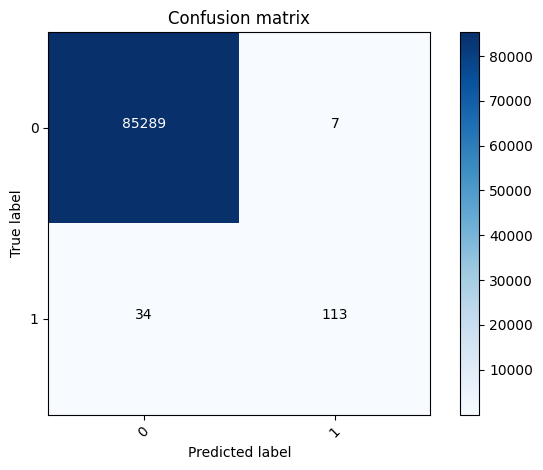

In [65]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

- while only 7 regular transactions are wrongly predicted as fraudulent, the model only detects 78% of the fraudulent transactions. As a consequence 34 fraudulent transactions are not detected (False Negatives).
- Let's see if we can improve this performance with other machine learning

In [93]:
!pip install --upgrade scikit-learn

In [94]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import plot_roc_curve
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

Let's store each model's performance in a dataframe for comparison purpose

In [72]:
### Store results in dataframe for comparing various Models
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.99952,0.231293,0.768707,0.941667,0.846442


In [92]:
ROC_RF = plot_roc_curve(random_forest, X_test, y_test)
plt.show()

NameError: name 'plot_roc_curve' is not defined

We will run the models on the full dataset to check.

Confusion matrix, without normalization
[[284308      7]
 [    34    458]]


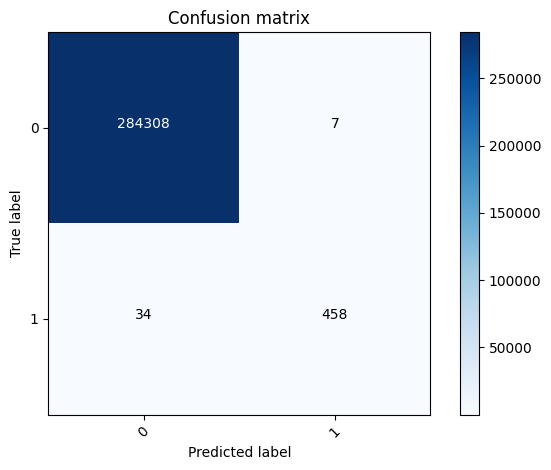

In [95]:
# Confusion matrix on the whole dataset
y_pred = random_forest.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [78]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9999 	precision:0.9849 	recall:0.9309 	F1-score:0.9572


In [79]:
results_fullset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999856,0.069106,0.930894,0.984946,0.957158


## Decision trees

In [80]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [81]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [82]:
y_pred = decision_tree.predict(X_test)

In [83]:
decision_tree.score(X_test,y_test)

0.9992509626300574

Confusion matrix, without normalization
[[85270    26]
 [   38   109]]


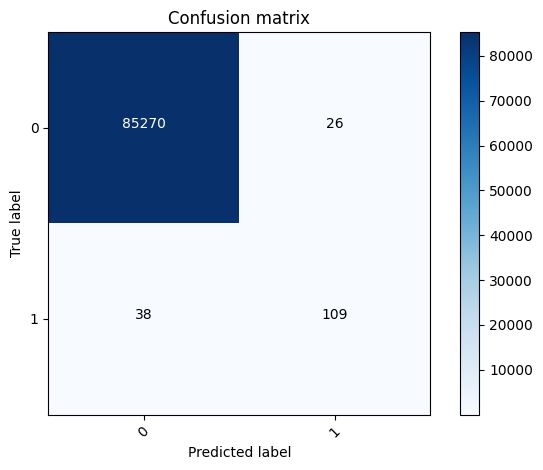

In [84]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

- The performance of the Decision Tree model is below the one using Random Forest. Let's check the performance indicators.

In [85]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [87]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = pd.concat([results_testset,model_results], ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999520,0.231293,0.768707,0.941667,0.846442
1,DecisionTree,0.999251,0.258503,0.741497,0.807407,0.773050


In [88]:
ROC_DT = plot_roc_curve(decision_tree, X_test, y_test)
plt.show()

NameError: name 'plot_roc_curve' is not defined

Confusion matrix, without normalization
[[284289     26]
 [    38    454]]


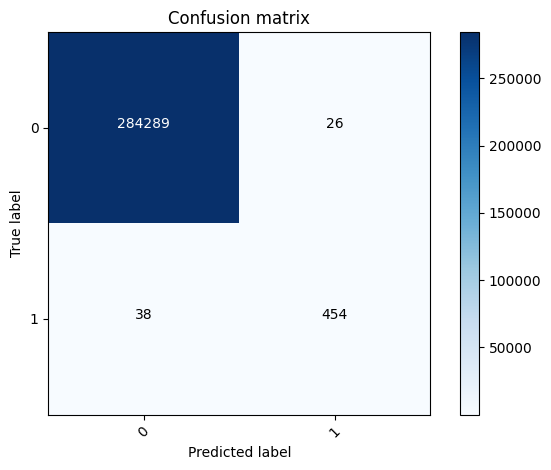

In [96]:
# Confusion matrix on the whole dataset
y_pred = decision_tree.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [97]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

In [99]:
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = pd.concat([results_fullset,model_results], ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999856,0.069106,0.930894,0.984946,0.957158
1,DecisionTree,0.999775,0.077236,0.922764,0.945833,0.934156


## Undersampling
- In order to balance the train set, another technique is undersampling. With this technique, we adjust the largest class to match the number of samples of the under-represented class. Here we want to randomly pick an amount of non-fraudulent transactions equal to the number of fraudulent transactions in the dataset.

In [115]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [116]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [117]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                480       
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dense_8 (Dense)             (None, 24)                600       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2113 (8.25 KB)
Trainable params: 2113 (8

In [118]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 29), found shape=(None, 30)


In [100]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [101]:
normal_indices = data[data.Class == 0].index

In [102]:
len(normal_indices)

284315

In [103]:
# Random select N indices from non fraudulent samples (N equals to number of fraudulent records)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [104]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [105]:
under_sample_data = data.iloc[under_sample_indices,:]

In [106]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [108]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Confusion matrix, without normalization
[[141   6]
 [  6 143]]


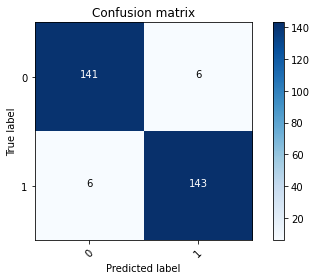

In [ ]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- The metrics look pretty strong on the test set....

In [ ]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [ ]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999380,0.217687,0.782313,0.845588,0.812721
3,WeightedNeuralNetwork,0.975937,0.102041,0.897959,0.060746,0.113793
4,UnderSampledNeuralNetwork,0.959459,0.040268,0.959732,0.959732,0.959732


....But the model fails on non fraudulent transactions as shown below.

Confusion matrix, without normalization
[[274591   9724]
 [    16    476]]


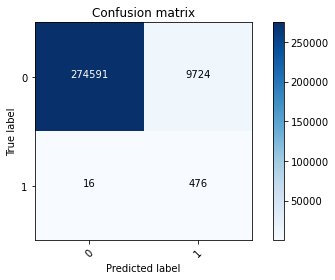

In [ ]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [ ]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [ ]:
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999403,0.211382,0.788618,0.854626,0.820296
3,WeightedNeuralNetwork,0.976349,0.048780,0.951220,0.065181,0.122002
4,UnderSampledNeuralNetwork,0.965801,0.032520,0.967480,0.046667,0.089039


## Oversampling technique using SMOTE
(Synthetic Minority Oversample TEchnique)
- the alternative to down-sampling is the upsampling of the minority class to the same level as the dominant one.
- This can be achieved with the SMOTE method where a new vector is generated between 2 existing datapoints. Applying this technique allows to massively increase the number of fraudulent transactions

In [131]:
#%%bash
!pip uninstall scikit-learn

Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.5.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.5.1


In [132]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)


In [134]:
pip install --upgrade imbalanced-learn


In [135]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_fit_context' from 'sklearn.base' (/usr/local/lib/python3.10/dist-packages/sklearn/base.py)

In [ ]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [ ]:
y_resample

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
print('Number of total transactions before SMOTE upsampling: ', len(y), '...after SMOTE upsampling: ', len(y_resample))
print('Number of fraudulent transactions before SMOTE upsampling: ', len(y[y.Class==1]),
      '...after SMOTE upsampling: ', np.sum(y_resample[y_resample==1]))

Number of total transactions before SMOTE upsampling:  284807 ...after SMOTE upsampling:  568630
Number of fraudulent transactions before SMOTE upsampling:  492 ...after SMOTE upsampling:  284315


In [ ]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 70s 177us/step - loss: 0.0442 - accuracy: 0.9841
Epoch 2/5
398041/398041 [==============================] - 68s 172us/step - loss: 0.0163 - accuracy: 0.9954
Epoch 3/5
398041/398041 [==============================] - 66s 167us/step - loss: 0.0126 - accuracy: 0.9966
Epoch 4/5
398041/398041 [==============================] - 69s 173us/step - loss: 0.0115 - accuracy: 0.9970
Epoch 5/5
398041/398041 [==============================] - 70s 175us/step - loss: 0.0107 - accuracy: 0.9974


Confusion matrix, without normalization
[[85150   232]
 [    0 85207]]


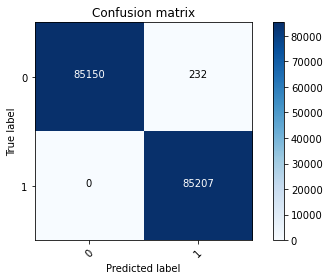

In [ ]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- Notice the absence of False Negatives. The model is able to detect all fraudulent transactions on the unseen test set.

In [ ]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [ ]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999380,0.217687,0.782313,0.845588,0.812721
3,WeightedNeuralNetwork,0.975937,0.102041,0.897959,0.060746,0.113793
4,UnderSampledNeuralNetwork,0.959459,0.040268,0.959732,0.959732,0.959732
5,OverSampledNeuralNetwork,0.998640,0.000000,1.000000,0.997285,0.998640


All metrics are excellent for this last model.

Confusion matrix, without normalization
[[283561    754]
 [     0    492]]


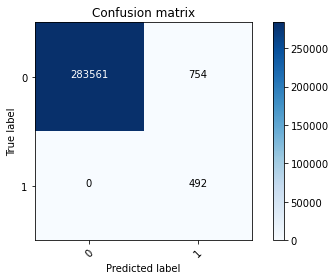

In [ ]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- Notice the absence of False Negatives. The model is able to detect all fraudulent transactions on the full dataset.
- Notice the limited number of False Positives which means a lot less verification work (on legitimate transactions) for the fraud departement

In [ ]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [ ]:
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999403,0.211382,0.788618,0.854626,0.820296
3,WeightedNeuralNetwork,0.976349,0.048780,0.951220,0.065181,0.122002
4,UnderSampledNeuralNetwork,0.965801,0.032520,0.967480,0.046667,0.089039
5,OverSampledNeuralNetwork,0.997353,0.000000,1.000000,0.394864,0.566168
